In [19]:
import os
os.getcwd()
os.chdir(r"C:\Users\adria\Desktop")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import copy

In [5]:
sales_df = pd.read_excel("real_retail_sales.xlsx", index_col = 'DATE', header = 0)

sales_df['sales'] = pd.to_numeric(sales_df['sales'], errors = 'coerce')
income_df = pd.read_excel("realpersincome.xlsx", index_col = 'DATE', header = 0)
sales_and_income_df = pd.concat([sales_df['sales'], income_df['realpersincome']], axis = 1, join = 'inner')

<Axes: xlabel='DATE', ylabel='sales'>

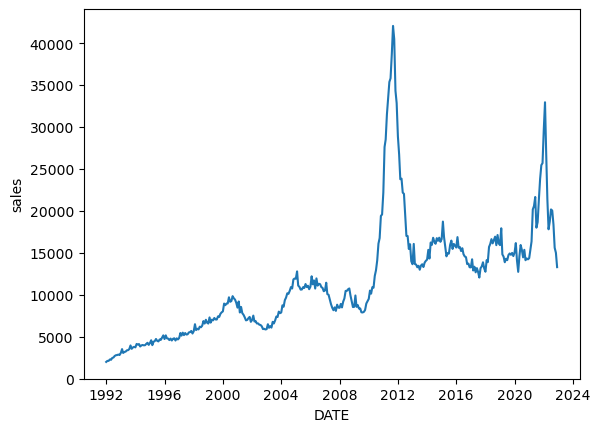

In [7]:
sns.lineplot(data = sales_df, x =sales_df.index, y = sales_df.sales)

In [11]:
sales_df['rollMean'] = sales_df.sales.rolling(window=12).mean()
sales_df['rollStd'] = sales_df.sales.rolling(window= 12).std()

<Axes: xlabel='DATE', ylabel='sales'>

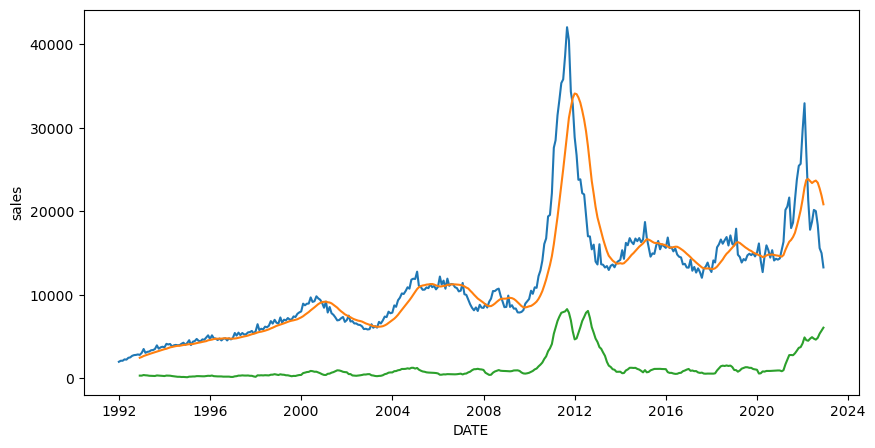

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data = sales_df, x= sales_df.index, y= sales_df.sales)
sns.lineplot(data = sales_df, x= sales_df.index, y= sales_df.rollMean)
sns.lineplot(data = sales_df, x= sales_df.index, y= sales_df.rollStd)

In [13]:
adfTest = adfuller(sales_df['sales'], autolag = 'AIC',)

In [14]:
adfTest

(-1.9791474508274196,
 0.29579038808113,
 13,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 5921.5737835950695)

In [15]:
adfTest[0:4]

(-1.9791474508274196, 0.29579038808113, 13, 358)

In [16]:
stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags', 'number of observations used'])

In [91]:
stats

Test Statistic                  -1.979147
p-value                          0.295790
#lags                           13.000000
number of observations used    358.000000
dtype: float64

In [17]:
for key, values in adfTest[4].items():
    print ('critical value', key, ":", values)

critical value 1% : -3.448748905151901
critical value 5% : -2.8696473721448728
critical value 10% : -2.5710891239349585


In [18]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var], autolag = 'AIC')
    stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags', 'number of observations used']) 
    print(stats)

    for key, values in adfTest[4].items():
        print ('critical value', key, ":", values)

    sns.lineplot(data = sales_df, x= sales_df.index, y= sales_df.sales)
    sns.lineplot(data = sales_df, x= sales_df.index, y= sales_df.rollMean)
    sns.lineplot(data = sales_df, x= sales_df.index, y= sales_df.rollStd)

Test Statistic                  -1.979147
p-value                          0.295790
#lags                           13.000000
number of observations used    358.000000
dtype: float64
critical value 1% : -3.448748905151901
critical value 5% : -2.8696473721448728
critical value 10% : -2.5710891239349585


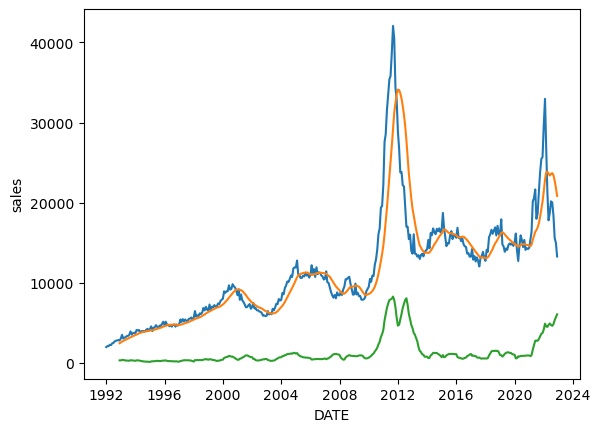

In [19]:
test_stationarity(sales_df, 'sales')

In [20]:
sales_df['shift'] = sales_df.sales.shift()

In [21]:
sales_df.head()

,sales,rollMean,rollStd,shift
DATE,,,,
1992-01-01,1978.919568,NaN,NaN,NaN
1992-02-01,2103.688021,NaN,NaN,1978.919568
1992-03-01,2100.550420,NaN,NaN,2103.688021
1992-04-01,2268.810267,NaN,NaN,2100.550420
1992-05-01,2232.827482,NaN,NaN,2268.810267


In [22]:
sales_df_subs = sales_df[['sales']]

In [23]:
sales_df_subs.head()

,sales
DATE,
1992-01-01,1978.919568
1992-02-01,2103.688021
1992-03-01,2100.550420
1992-04-01,2268.810267
1992-05-01,2232.827482


In [24]:
sales_df_subs = sales_df.copy()
sales_df_subs['shift'] = sales_df_subs['sales'].shift()
sales_df_subs['shiftDiff'] = sales_df_subs.sales - sales_df_subs['shift']


In [25]:
sales_df_subs

,sales,rollMean,rollStd,shift,shiftDiff
DATE,,,,,
1992-01-01,1978.919568,NaN,NaN,NaN,NaN
1992-02-01,2103.688021,NaN,NaN,1978.919568,124.768453
1992-03-01,2100.550420,NaN,NaN,2103.688021,-3.137601
1992-04-01,2268.810267,NaN,NaN,2100.550420,168.259847
1992-05-01,2232.827482,NaN,NaN,2268.810267,-35.982785
...,...,...,...,...,...
2022-08-01,20033.307990,23689.009925,4632.787133,20170.953590,-137.645600
2022-09-01,18362.660070,23435.384068,4847.460593,20033.307990,-1670.647920
2022-10-01,15595.885600,22752.747362,5344.652671,18362.660070,-2766.774470


C:\Users\adria\AppData\Local\Temp\ipykernel_22708\286532802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\adria\AppData\Local\Temp\ipykernel_22708\286532802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -5.501464
p-value                          0.000002
#lags                           17.000000
number of observations used    343.000000
dtype: float64
critical value 1% : -3.449559661646851
critical value 5% : -2.8700035112469626
critical value 10% : -2.5712790073013796


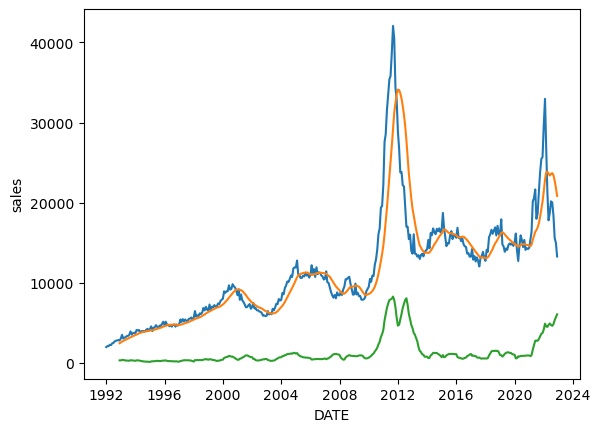

In [26]:
test_stationarity(sales_df_subs.dropna(), 'shiftDiff')

In [27]:
log_sales_df = sales_df[['sales']].copy()

In [28]:
log_sales_df['log'] = np.log(log_sales_df['sales'])

In [29]:
log_sales_df.head()

,sales,log
DATE,,
1992-01-01,1978.919568,7.590306
1992-02-01,2103.688021,7.651447
1992-03-01,2100.550420,7.649955
1992-04-01,2268.810267,7.727011
1992-05-01,2232.827482,7.711024


Test Statistic                  -2.363950
p-value                          0.152171
#lags                           14.000000
number of observations used    357.000000
dtype: float64
critical value 1% : -3.44880082033912
critical value 5% : -2.869670179576637
critical value 10% : -2.5711012838861036


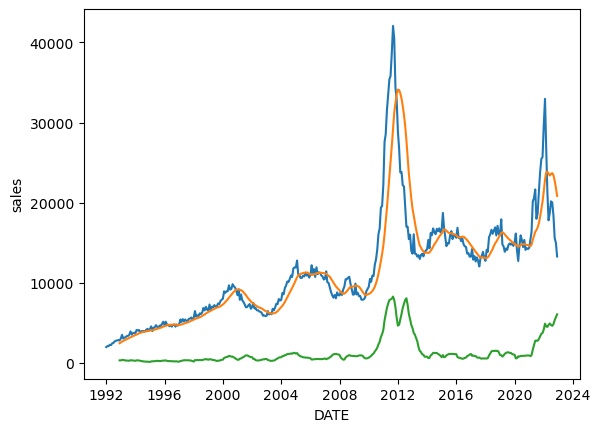

In [30]:
test_stationarity(log_sales_df, 'log')

In [31]:
sqrt_df = sales_df[['sales']].copy()

In [32]:
sqrt_df['sqrt'] = np.sqrt(sales_df_subs['sales'])

In [33]:
sqrt_df.head()

,sales,sqrt
DATE,,
1992-01-01,1978.919568,44.485049
1992-02-01,2103.688021,45.865979
1992-03-01,2100.550420,45.831762
1992-04-01,2268.810267,47.632030
1992-05-01,2232.827482,47.252804


Test Statistic                  -1.871451
p-value                          0.345608
#lags                           13.000000
number of observations used    358.000000
dtype: float64
critical value 1% : -3.448748905151901
critical value 5% : -2.8696473721448728
critical value 10% : -2.5710891239349585


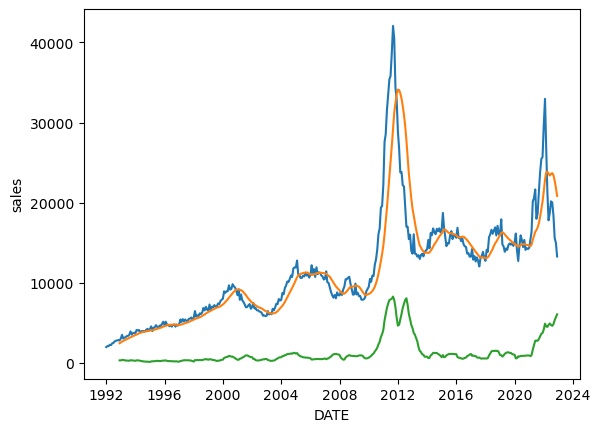

In [34]:
test_stationarity(sqrt_df, 'sqrt')

In [35]:
cbrt_df = sales_df[['sales']].copy()

In [36]:
cbrt_df.head()

cbrt_df['cbrt'] = np.cbrt(cbrt_df['sales'])

Test Statistic                  -1.903845
p-value                          0.330254
#lags                           13.000000
number of observations used    358.000000
dtype: float64
critical value 1% : -3.448748905151901
critical value 5% : -2.8696473721448728
critical value 10% : -2.5710891239349585


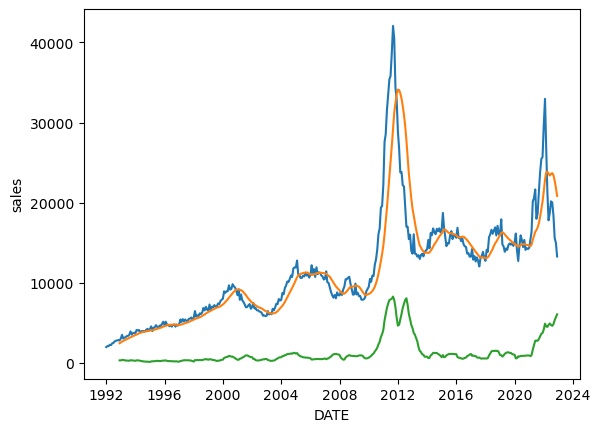

In [37]:
test_stationarity(cbrt_df, 'cbrt')

In [38]:
sales_df_subs

,sales,rollMean,rollStd,shift,shiftDiff
DATE,,,,,
1992-01-01,1978.919568,NaN,NaN,NaN,NaN
1992-02-01,2103.688021,NaN,NaN,1978.919568,124.768453
1992-03-01,2100.550420,NaN,NaN,2103.688021,-3.137601
1992-04-01,2268.810267,NaN,NaN,2100.550420,168.259847
1992-05-01,2232.827482,NaN,NaN,2268.810267,-35.982785
...,...,...,...,...,...
2022-08-01,20033.307990,23689.009925,4632.787133,20170.953590,-137.645600
2022-09-01,18362.660070,23435.384068,4847.460593,20033.307990,-1670.647920
2022-10-01,15595.885600,22752.747362,5344.652671,18362.660070,-2766.774470


In [39]:
sales_df_2 = sales_df[['sales']].copy(deep=True)

In [40]:
sales_df_2.head()

,sales
DATE,
1992-01-01,1978.919568
1992-02-01,2103.688021
1992-03-01,2100.550420
1992-04-01,2268.810267
1992-05-01,2232.827482


In [41]:
sales_df_2['firstDiff'] = sales_df_2['sales'].diff()
sales_df_2['Diff12'] = sales_df_2['sales'].diff(12)
sales_df_2['scndDiff'] = sales_df_2['sales'].diff().diff()

In [42]:
sales_df_2

,sales,firstDiff,Diff12,scndDiff
DATE,,,,
1992-01-01,1978.919568,NaN,NaN,NaN
1992-02-01,2103.688021,124.768453,NaN,NaN
1992-03-01,2100.550420,-3.137601,NaN,-127.906054
1992-04-01,2268.810267,168.259847,NaN,171.397448
1992-05-01,2232.827482,-35.982785,NaN,-204.242632
...,...,...,...,...
2022-08-01,20033.307990,-137.645600,1377.92828,-1555.252660
2022-09-01,18362.660070,-1670.647920,-3043.51028,-1533.002320
2022-10-01,15595.885600,-2766.774470,-8191.64048,-1096.126550


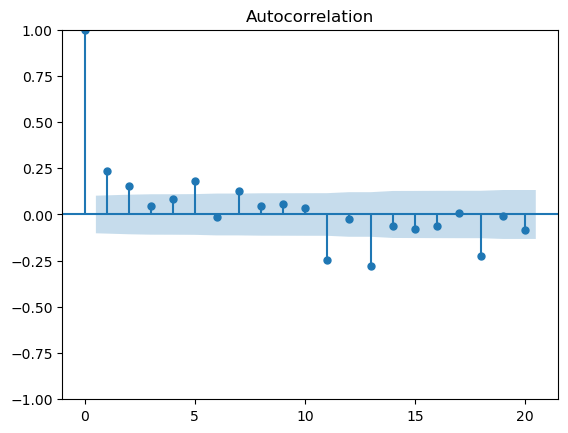

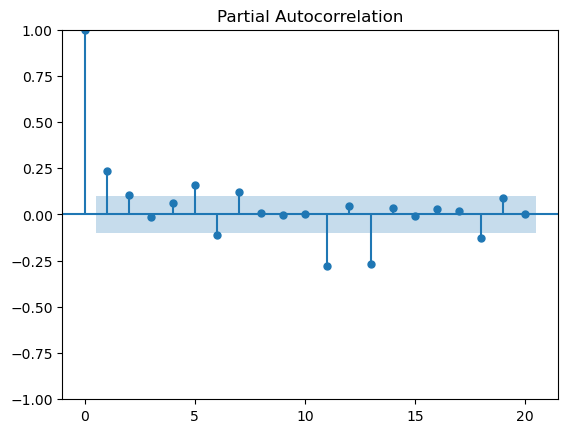

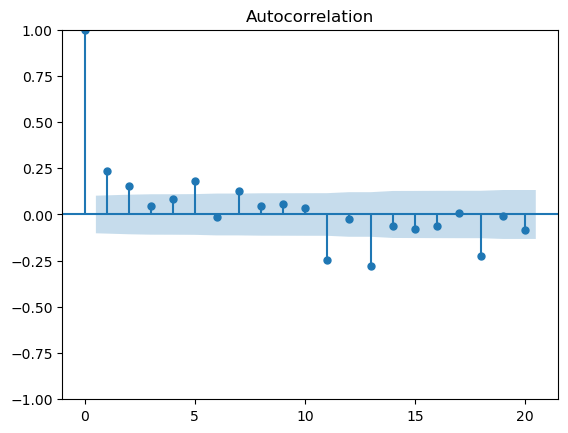

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(sales_df_2['firstDiff'].dropna(), lags = 20)
plot_acf(sales_df_2['firstDiff'].dropna(), lags = 20)


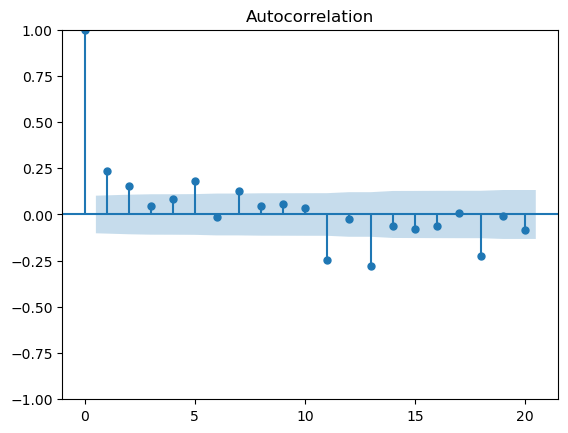

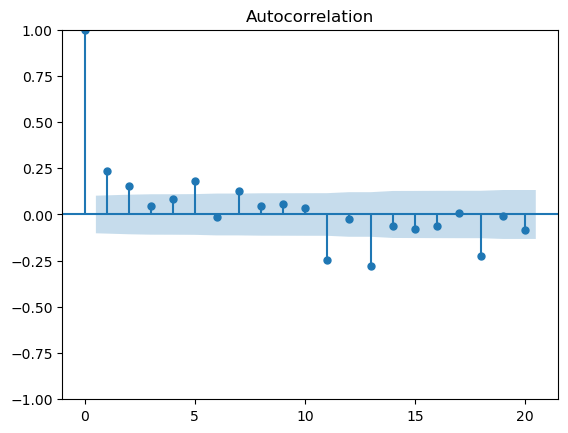

In [45]:
plot_acf(sales_df_2['firstDiff'].dropna(), lags = 20)